# Data Illustration

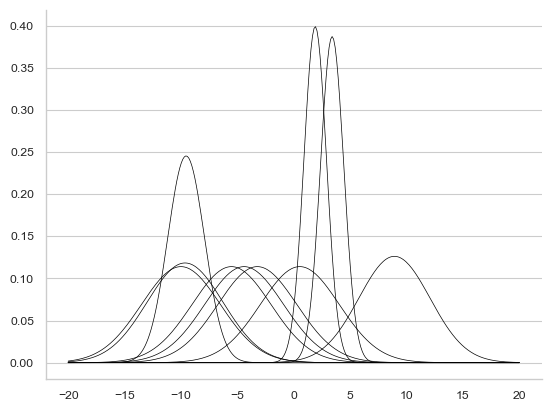

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyfrechet.metric_spaces import *
import numpy as np
from scipy import stats

np.random.seed(22)
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
p = 10
alpha=np.random.randn()
beta=np.random.randn(p)
sig0=1
gam=2.5
for i in range(10):    
    x = np.random.randn(p)
    eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    mu = 10*np.cos(eta*np.pi)
    sig = sig0 + gam*stats.logistic.cdf(eta)
    xs = np.linspace(-20,20,300)
    plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sig), color='black', alpha=1, linewidth=0.5)
plt.gca().spines[['right', 'top']].set_visible(False)
plt.grid(axis='x')
plt.savefig("../plots/sample_wasserstein.pdf")

# Simulation results

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import json

OUT_FILE = 'results/20230626-result_wasserstein_merged.json'

with open(OUT_FILE, 'r') as f:
    results = json.load(f)

df = pd.DataFrame(results, columns=['method', 'N', 'p', 'duration', 'dist_duration', 'err'])
df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)

df['fitting_duration'] = df['duration'] - df['dist_duration']

In [ ]:
from plot_bench import *
forest_df = make_forest_df(df)
grid = plot_forest_df(forest_df)
plt.savefig("../plots/runtime_wasserstein.pdf")

In [ ]:
from plot_bench import *
plot_errors(df[df.N > 50])
plt.savefig("../plots/error_wasserstein.pdf")